<a href="https://colab.research.google.com/github/Tiamiyu1/HDSC-Premiere-Project-Team_PCA-/blob/main/Model%20Building/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION OF DEMENTIA**

In [181]:
# Import Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [182]:
# pip install colorama

In [183]:
plt.style.use('seaborn')
from colorama import Style, Fore, Back

In [184]:
# Read dementia dfset.
df=pd.read_csv("D:\Documents\PROJECTS\PYTHON PROGRAMMING\ML\Hamoye_Internship_Projects\HDSC-Premiere-Project-Team_PCA-\Data\dementia_dataset.csv")

In [185]:
# Display first 5 observations and features.
df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## **STEP 1: EXPLORATORY DATA ANALYSIS**

In [186]:
# Renaming the variables to something that convey meaning
df.rename(columns={'M/F':'Gender','MR Delay':'MR_Delay', 'Hand':'Handedness', 'EDUC':'Years_of_Edu',
         'SES':'Socioeconomic_Status', 'MMSE':'Mini_Mental_State_Exam',
         'CDR':'Clinical_Dementia_Rating', 'eTIV':'Estimated_total_intracranial_volume',
        'nWBV':'Normalized_whole_brain_volume', 'ASF':'Atlas_scaling_factor'}, 
      inplace=True)

# https://www.kaggle.com/sid321axn/eda-for-predicting-dementia

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject ID                           373 non-null    object 
 1   MRI ID                               373 non-null    object 
 2   Group                                373 non-null    object 
 3   Visit                                373 non-null    int64  
 4   MR_Delay                             373 non-null    int64  
 5   Gender                               373 non-null    object 
 6   Handedness                           373 non-null    object 
 7   Age                                  373 non-null    int64  
 8   Years_of_Edu                         373 non-null    int64  
 9   Socioeconomic_Status                 354 non-null    float64
 10  Mini_Mental_State_Exam               371 non-null    float64
 11  Clinical_Dementia_Rating        

**INFERENCE** 

There are 373 observations and 15 columns.

Two columns have missing values.

There are object, float and integer data types.

#### **Descriptive statistics for the numerical columns.**

In [188]:
df.describe()

,Visit,MR_Delay,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### **Descriptive statistics for the categorical columns.**

In [189]:
df.describe(include=[object])

,Subject ID,MRI ID,Group,Gender,Handedness
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


#### **Check for missing values.**

In [190]:
df.isna().sum()

Subject ID                              0
MRI ID                                  0
Group                                   0
Visit                                   0
MR_Delay                                0
Gender                                  0
Handedness                              0
Age                                     0
Years_of_Edu                            0
Socioeconomic_Status                   19
Mini_Mental_State_Exam                  2
Clinical_Dementia_Rating                0
Estimated_total_intracranial_volume     0
Normalized_whole_brain_volume           0
Atlas_scaling_factor                    0
dtype: int64

#### **Display Unique values in each field.**

In [191]:
# Function to display UNIQUE values in each field

def getDesc(df, Column, numExamples=5):
    x = list(set([i for i in df[Column] if i==i]))
    if len(x)<numExamples:
        numExamples = len(x)
    x = list(np.random.choice(x, size=numExamples, replace=False))
    print('Examples in '+Style.BRIGHT+Back.CYAN+Column+Back.RESET+':'+Style.RESET_ALL, x, '\n')
    return None

# Function to display the number of missing values in each field

def getNumNan(df, thisFeature):
    ms = df[df[thisFeature] != df[thisFeature]].shape[0]
    print('Missing values in '+Style.BRIGHT+Back.CYAN+thisFeature+Back.RESET+Style.RESET_ALL+': {}'.format(ms))
    return None

In [192]:
for i in df.columns:
    getNumNan(df, i)
    getDesc(df, i, 7)

Missing values in Subject ID: 0
Examples in Subject ID: ['OAS2_0062', 'OAS2_0127', 'OAS2_0111', 'OAS2_0134', 'OAS2_0058', 'OAS2_0144', 'OAS2_0008'] 

Missing values in MRI ID: 0
Examples in MRI ID: ['OAS2_0035_MR2', 'OAS2_0051_MR2', 'OAS2_0001_MR1', 'OAS2_0131_MR2', 'OAS2_0055_MR1', 'OAS2_0112_MR1', 'OAS2_0055_MR2'] 

Missing values in Group: 0
Examples in Group: ['Nondemented', 'Demented', 'Converted'] 

Missing values in Visit: 0
Examples in Visit: [3, 1, 4, 2, 5] 

Missing values in MR_Delay: 0
Examples in MR_Delay: [952, 2639, 640, 723, 584, 733, 570] 

Missing values in Gender: 0
Examples in Gender: ['F', 'M'] 

Missing values in Handedness: 0
Examples in Handedness: ['R'] 

Missing values in Age: 0
Examples in Age: [78, 67, 71, 84, 95, 83, 86] 

Missing values in Years_of_Edu: 0
Examples in Years_of_Edu: [12, 6, 11, 15, 14, 13, 18] 

Missing values in Socioeconomic_Status: 19
Examples in Socioeconomic_Status: [1.0, 4.0, 2.0, 3.0, 5.0] 

Missing values in Mini_Mental_State_Exam: 2

#### **DATA VISUALIZATION**

Text(0.5, 1.0, 'Histogram of Socioeconomic_Status')

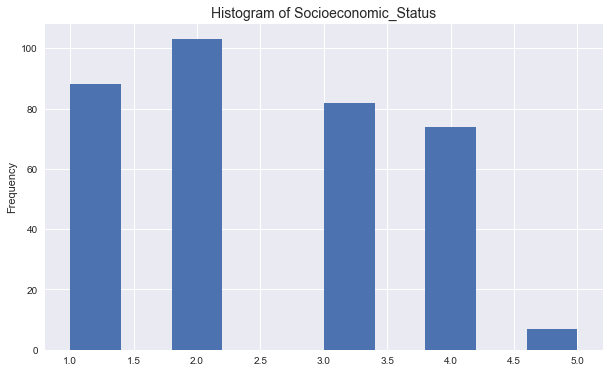

In [193]:
# Visualization of the Socioeconomic_Status column.

fig = plt.figure(figsize = (10,6))
df['Socioeconomic_Status'].plot(kind='hist', grid=True)
plt.title('Histogram of Socioeconomic_Status', fontsize = 14)

<AxesSubplot:ylabel='Density'>

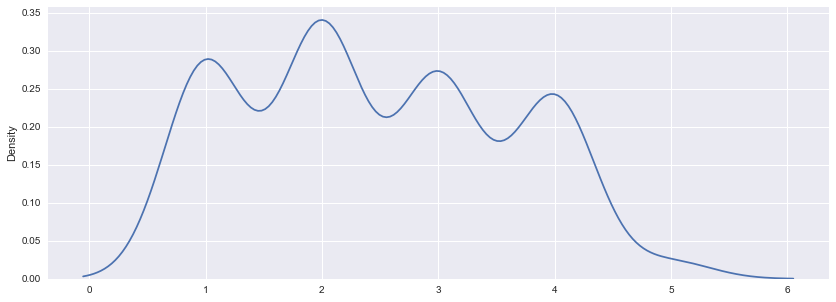

In [194]:
# Distribution plot.

fig = plt.figure(figsize = (14,5))
sns.distplot(df[['Socioeconomic_Status']], hist = False)

Text(0.5, 1.0, 'Histogram of Mini_Mental_State_Exam')

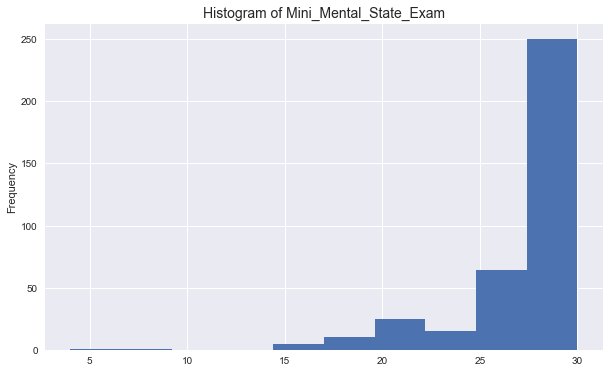

In [195]:
# Visualization of the Mini_Mental_State_Exam column

fig = plt.figure(figsize = (10,6))
df['Mini_Mental_State_Exam'].plot(kind='hist', grid=True)
plt.title('Histogram of Mini_Mental_State_Exam', fontsize = 14)

<AxesSubplot:ylabel='Density'>

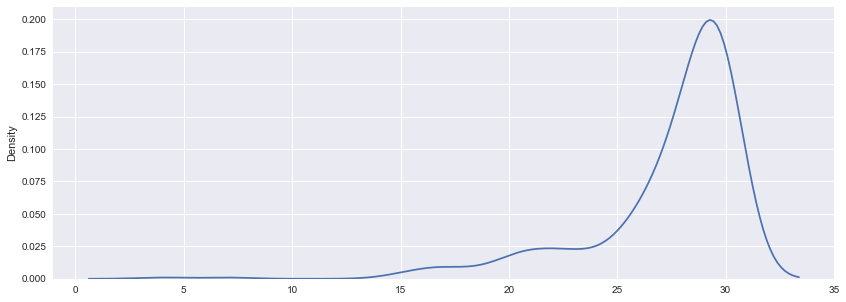

In [196]:
# Distribution plot.

fig = plt.figure(figsize = (14,5))
sns.distplot(df[['Mini_Mental_State_Exam']], hist = False)

In [197]:
#Imputing the missing values with median
#same reason as SES

df['Mini_Mental_State_Exam'].fillna((df['Mini_Mental_State_Exam'].median()), inplace=True)

In [198]:
#Cross-checking for percentage of missing vales

df.isnull().sum()/len(df.index) * 100

Subject ID                             0.000000
MRI ID                                 0.000000
Group                                  0.000000
Visit                                  0.000000
MR_Delay                               0.000000
Gender                                 0.000000
Handedness                             0.000000
Age                                    0.000000
Years_of_Edu                           0.000000
Socioeconomic_Status                   5.093834
Mini_Mental_State_Exam                 0.000000
Clinical_Dementia_Rating               0.000000
Estimated_total_intracranial_volume    0.000000
Normalized_whole_brain_volume          0.000000
Atlas_scaling_factor                   0.000000
dtype: float64

#### **CHECKING FOR CORRELATION**

In [199]:
# Correlation matrix.
corr = df.corr()
corr

,Visit,MR_Delay,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.027381,0.002325,0.117428,-0.126682,-0.120399
MR_Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.066619,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055255,-0.026257,0.042348,-0.518359,-0.035067
Years_of_Edu,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.192158,-0.153121,0.257015,-0.012200,-0.241752
Socioeconomic_Status,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
Mini_Mental_State_Exam,-0.027381,0.066619,0.055255,0.192158,-0.149219,1.000000,-0.674876,-0.036234,0.342189,0.044960
Clinical_Dementia_Rating,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.674876,1.000000,0.022819,-0.344819,-0.029340
Estimated_total_intracranial_volume,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.036234,0.022819,1.000000,-0.210122,-0.988877
Normalized_whole_brain_volume,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.342189,-0.344819,-0.210122,1.000000,0.213476
Atlas_scaling_factor,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.044960,-0.029340,-0.988877,0.213476,1.000000


<AxesSubplot:>

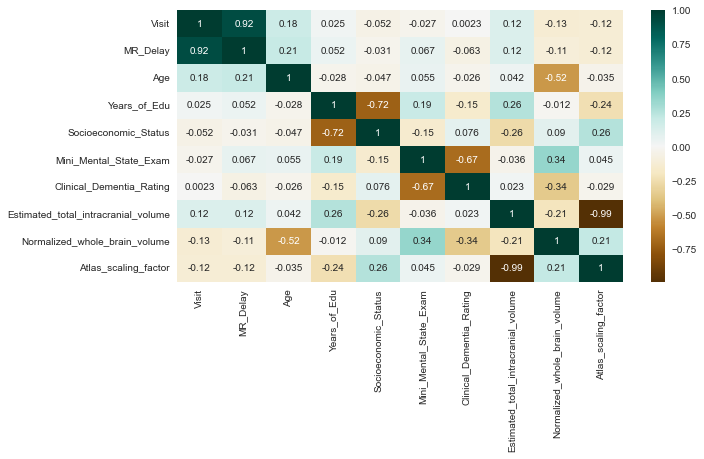

In [200]:
# Correlation matrix with Heatmap. 
plt.figure(figsize = (10, 5))
sns.heatmap(corr,cmap ='BrBG', annot = True)

**INFERENCE**

-->visit and MR Delay are highly correlated

-->ASF and eTIV are also highly -ve correlated


#### **UNIVARIATE ANALYSIS**

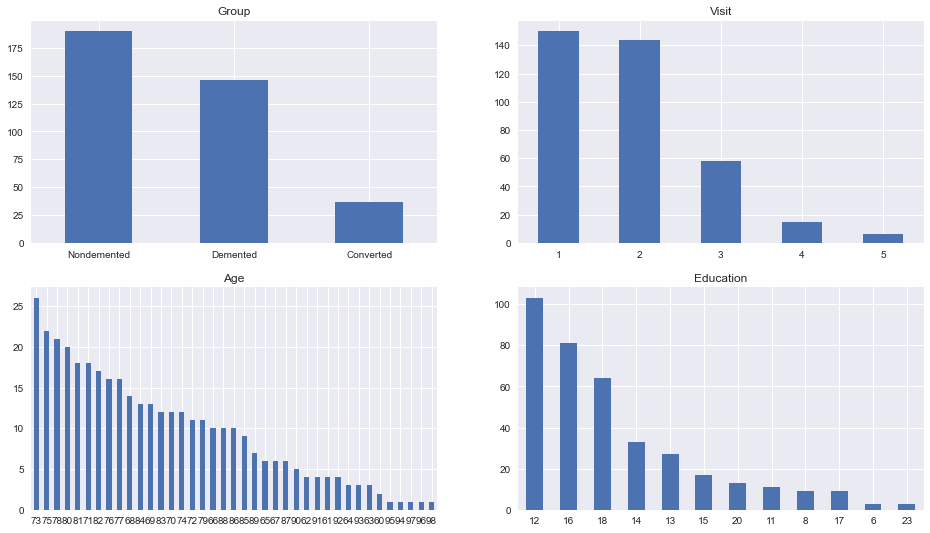

In [201]:
plt.subplot(221)
df['Group'].value_counts().plot(kind='bar',title='Group',figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
df['Visit'].value_counts().plot(kind='bar',title='Visit')
plt.xticks(rotation=0)
plt.subplot(223)
df['Age'].value_counts().plot(kind='bar',title='Age')
plt.xticks(rotation=0)
plt.subplot(224)
df['Years_of_Edu'].value_counts().plot(kind='bar',title='Education')
plt.xticks(rotation=0)

plt.show()

<AxesSubplot:xlabel='Socioeconomic_Status', ylabel='Density'>

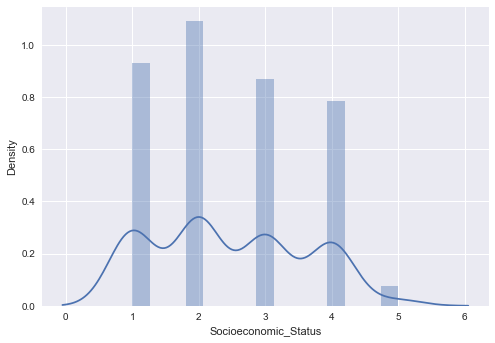

In [202]:
sns.distplot(df['Socioeconomic_Status'])

**INFERENCE**

Here we see that majority of them has socioeconomic status less than average.

#### Analysing the Age feature.

<AxesSubplot:ylabel='Density'>

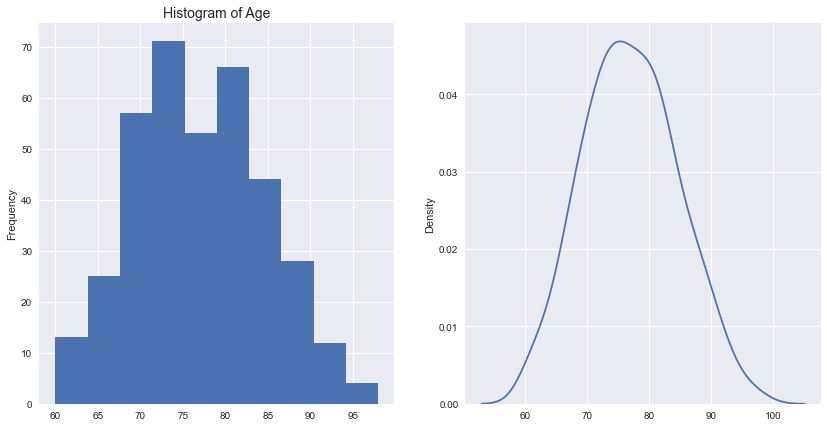

In [203]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df['Age'].plot(kind='hist', grid=True)
plt.title('Histogram of Age', fontsize = 14)

plt.subplot(122)
sns.distplot(df[['Age']], hist = False)

#### **BIVARIATE ANALYSIS**

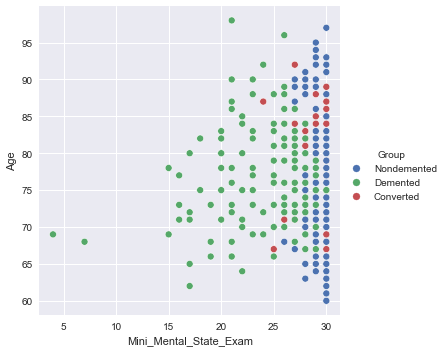

In [204]:
sns.relplot(x='Mini_Mental_State_Exam',y='Age',hue='Group',data=df)

**INFERENCE**

We can see that most of the non demented individuals have high MMSE score across all ages hence, a good mental state. Also, we have more demented individuals within the age of 75-85,and their dementia is mild (since MMSE score is within 20-25 here)

### DISCUSSION ABOUT THE TARGET VARIABLE

Analysing the 'Group' and 'CDR Column', and choosing which is best as the Target Variable.

From the Group Column, we have:

Demented : Subjects that were tagged as Demented at the start of the Study and remained so till the end of the study.

Non-demented : Subjects that were tagged as Undemented at the start of the Study and remained so till the end of the study.

Converted : Subjects that were tagged as Undemented at the Start of the study, but as the study progressed were tgged as Demented.

<AxesSubplot:ylabel='Group'>

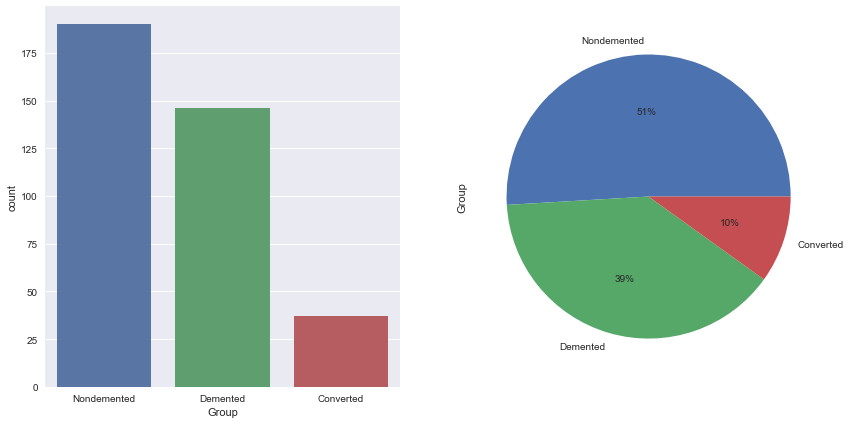

In [205]:
# Visualizing the Group column

plt.figure(figsize=(14,7))
plt.subplot(121)
label = df['Group'].unique().tolist()
sns.countplot(df['Group'])

plt.subplot(122)
df['Group'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

**INFERENCE**

As the Converted Group, appears somewhat Obscured, lets further probe into it

In [206]:
# Collecting all "Converted" group.
df.loc[df['Group'] == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR_Delay,Gender,Handedness,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


**INFERENCE**

Any of the two can be used as the target i.e., 'Group' or 'CDR'.

For the 'Group' column:

'Converted' means the subject was initially non demented during the start of the study, but became demented along the way.

For the CDR column:

CDR stands for Clinical Dementia Rating.

The CDR Scoring Table provides descriptive anchors that guide the clinician in making appropriate ratings based on interview data and clinical judgment. In addition to ratings for each domain, an overall CDR score may be calculated through the use of an CDR™ Scoring Algorithm. This score is useful for characterizing and tracking a patient’s level of impairment/dementia:

0 = Normal,
0.5 = Very Mild Dementia or Questionable,
1 = Mild Dementia,
2 = Moderate Dementia,
3 = Severe Dementia.

In [207]:
df['Clinical_Dementia_Rating'].unique()

array([0. , 0.5, 1. , 2. ])

In [208]:
#Visualizing the relationship between Group and CDR

df1= df.groupby(['Group', 'Clinical_Dementia_Rating'])['Group'].count().unstack('Clinical_Dementia_Rating')
df1

Clinical_Dementia_Rating,0.0,0.5,1.0,2.0
Group,,,,
Converted,18.0,19.0,NaN,NaN
Demented,NaN,102.0,41.0,3.0
Nondemented,188.0,2.0,NaN,NaN


<AxesSubplot:xlabel='Group'>

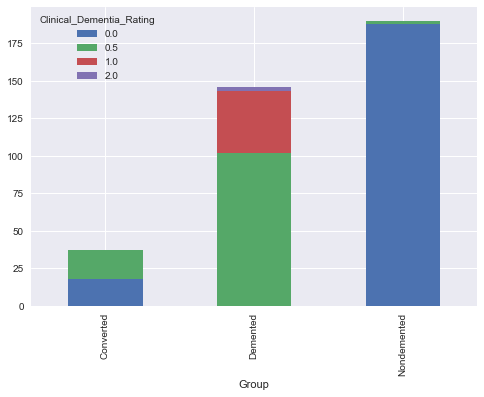

In [209]:
df1.plot(kind='bar', stacked = True)

#### Categorizing the CDR column

In [210]:
def cat_CDR(n):
    if n == 0:
        return 'Normal'

    elif n == 0.5 or n==1:
        return 'Mild'    
    

    else:                                         
        return 'Moderate'


df['Cat_CDR'] = df['Clinical_Dementia_Rating'].apply(lambda x: cat_CDR(x))

In [211]:
df.head()


,Subject ID,MRI ID,Group,Visit,MR_Delay,Gender,Handedness,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor,Cat_CDR
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,Mild
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,Mild
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,Mild


#### Analysing MMSE

About MMSE (Mini Mental State Examination).

A practical method for grading the cognitive state of patients for the clinician study. The MMSE was designed as a screening test for the purpose of evaluating cognitive impairment in older adults. It is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment.

Interpretations: Any score of 24 or more (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment.That is, even a maximum score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing.

<AxesSubplot:ylabel='Mini_Mental_State_Exam'>

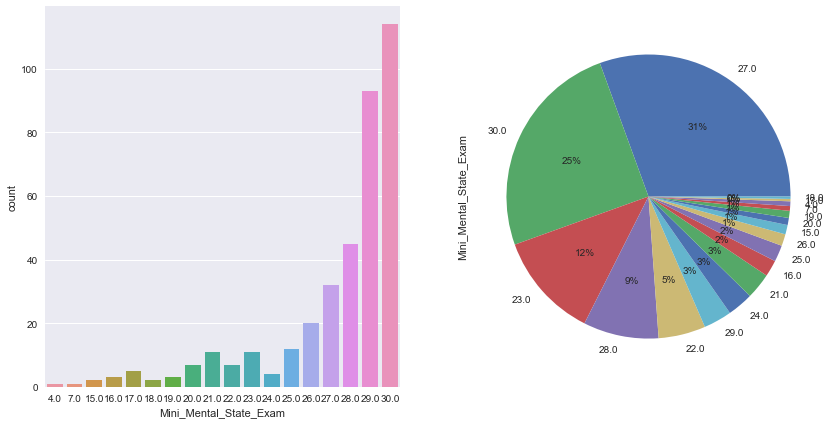

In [212]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(df['Mini_Mental_State_Exam']) 

plt.subplot(122)
label = df['Mini_Mental_State_Exam'].unique().tolist()
df['Mini_Mental_State_Exam'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

In [213]:
# From the definition of the MMSE Feature, let's categorize it

def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9: 
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:
        return 'Mild'


df['Cat_MMSE'] = df['Mini_Mental_State_Exam'].apply(lambda x: cat_MMSE(x))

<AxesSubplot:ylabel='Cat_MMSE'>

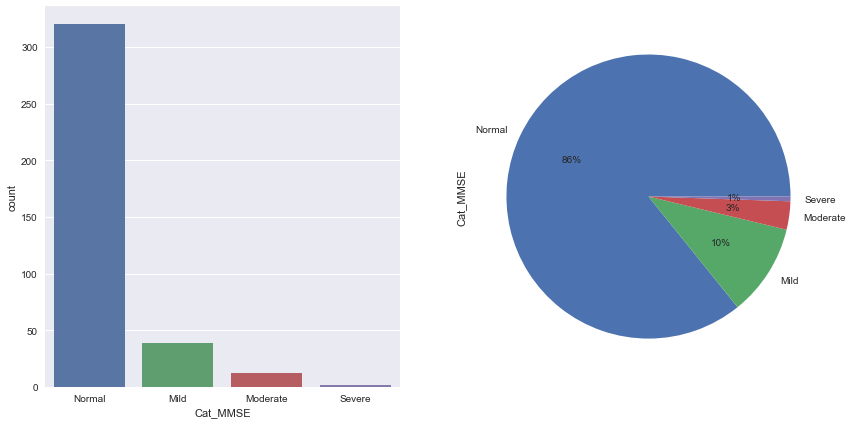

In [214]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(df['Cat_MMSE'])

plt.subplot(122)
label = df['Cat_MMSE'].unique().tolist()
df['Cat_MMSE'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

In [215]:
# A function that makes comparison plot between Cat_CDR and other categorical variables

def cat_comparison_plot(cat):
    fig = plt.figure(figsize=(18,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    
    
    df2 = df.groupby([cat, 'Cat_CDR'])[cat].count().unstack('Cat_CDR')
    df2.plot(kind='bar', stacked = True, ax = ax2)
    result = df.groupby(cat).apply (lambda group: (group.Cat_CDR == 'Normal').sum() / float(group.Cat_CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 - result.Normal
    result.plot(kind='bar', stacked = True, ax = ax1, grid=True)
    
    plt.show()

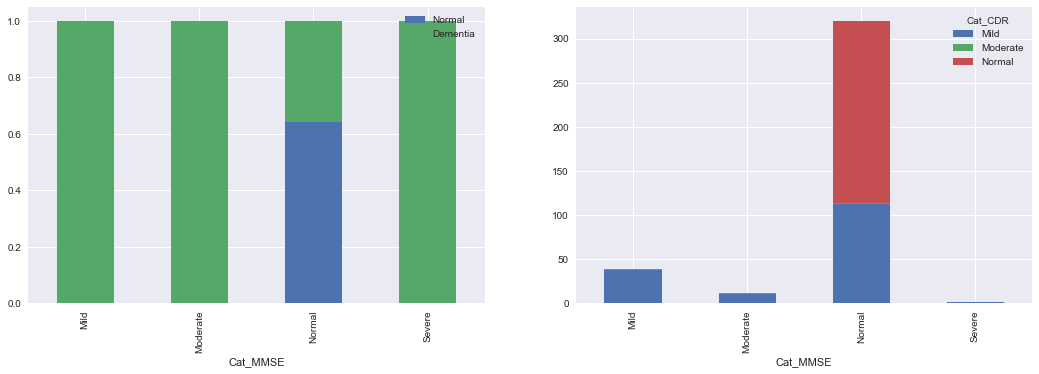

In [216]:
cat_comparison_plot('Cat_MMSE')

**INFERENCE**

From the above plot, 100% of all mild, moderate and severe Cat_MMSE cases are demented. About 40% of the Normal Cat_MMSE cases are Demented.

In [217]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR_Delay', 'Gender',
       'Handedness', 'Age', 'Years_of_Edu', 'Socioeconomic_Status',
       'Mini_Mental_State_Exam', 'Clinical_Dementia_Rating',
       'Estimated_total_intracranial_volume', 'Normalized_whole_brain_volume',
       'Atlas_scaling_factor', 'Cat_CDR', 'Cat_MMSE'],
      dtype='object')

#### Analysing features with Cat_CDR.

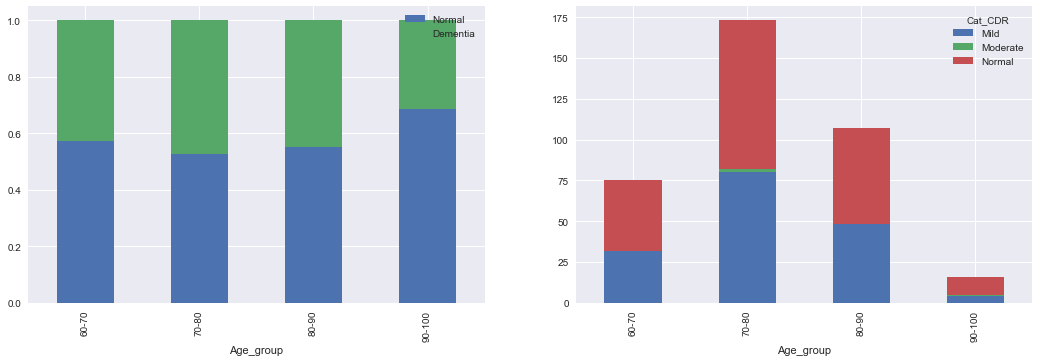

In [218]:
# Categorizing the 'Age' Feature.
df['Age_group'] = pd.cut(df['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])

cat_comparison_plot('Age_group')

**INFERENCE**

From the plot, majority of the Dementia cases are in age group 70-80 years.

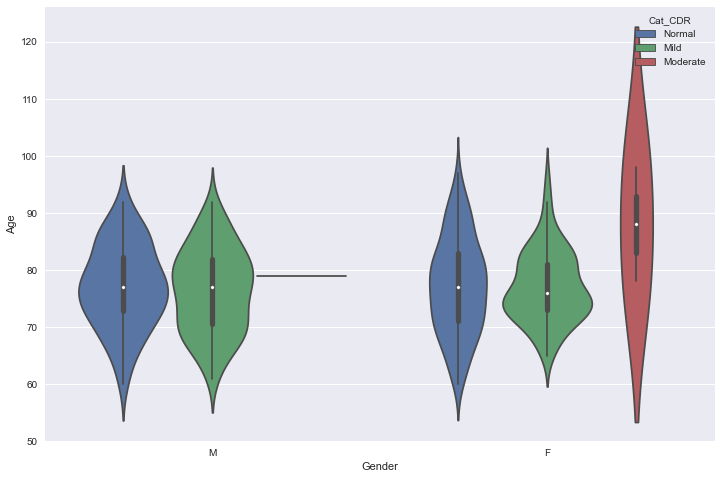

In [219]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Age",hue="Cat_CDR", data=df)
plt.show()

**INFERENCE**

From the above plot:

In Males, number of dementia cases peaks around 80 years while in females, demntia is prevalent around 75 years of age. Male dementia starts early, before 60 years, but female dementia starts generally after 60 years.

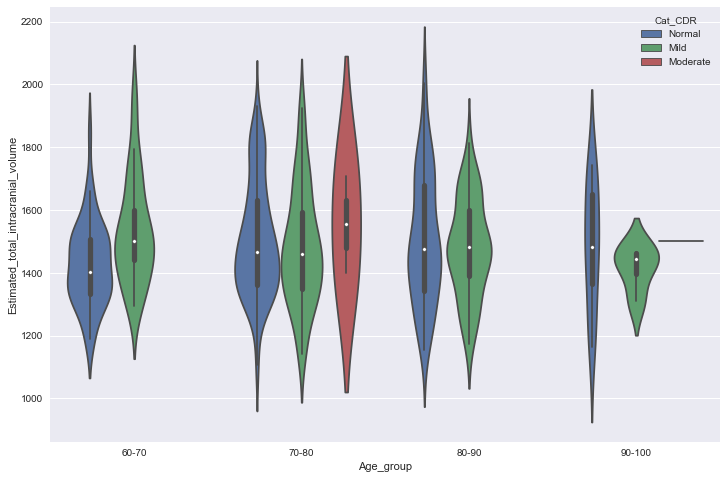

In [220]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Age_group", y="Estimated_total_intracranial_volume",hue="Cat_CDR", data=df)
plt.show()

**INFERENCE**

Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD).The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR).

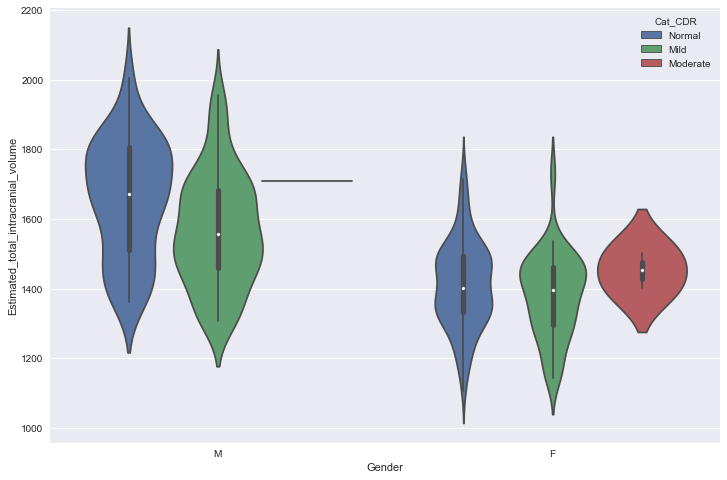

In [221]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Estimated_total_intracranial_volume",hue="Cat_CDR", data=df)
plt.show()

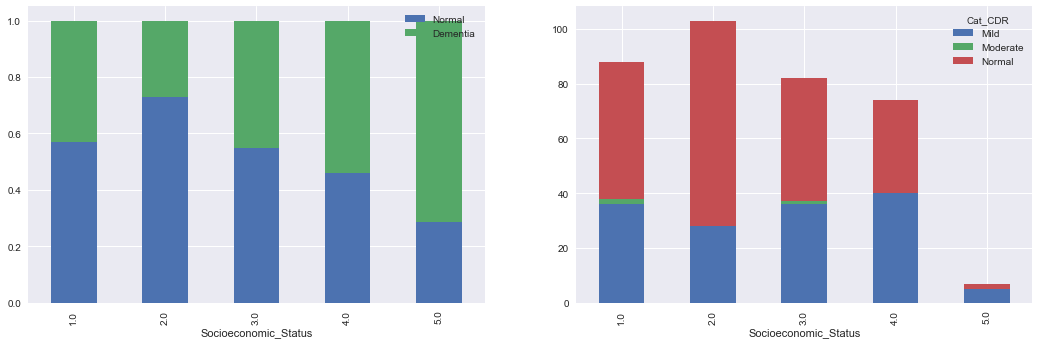

In [222]:
cat_comparison_plot('Socioeconomic_Status')

**INFERENCE**

From the plot above:

Highest probability of dementia occured at the lowest level of socio economic status.. which makes sense.

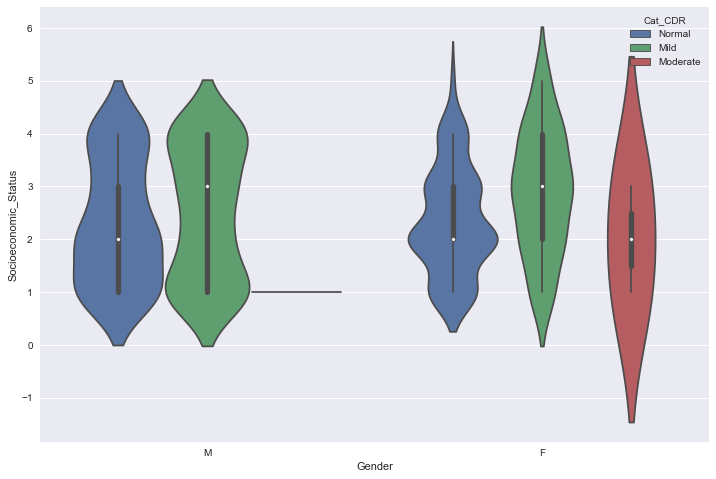

In [223]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Socioeconomic_Status",hue="Cat_CDR", data=df)
plt.show()

**INFERENCE**

From the above:

In Males, the two peaks of dementia occurs at 1(Highest status), and 4(Lower status).

In Females, highest peak is at 2, and there are slightly less demnetia cases at 1 and 5.

SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)

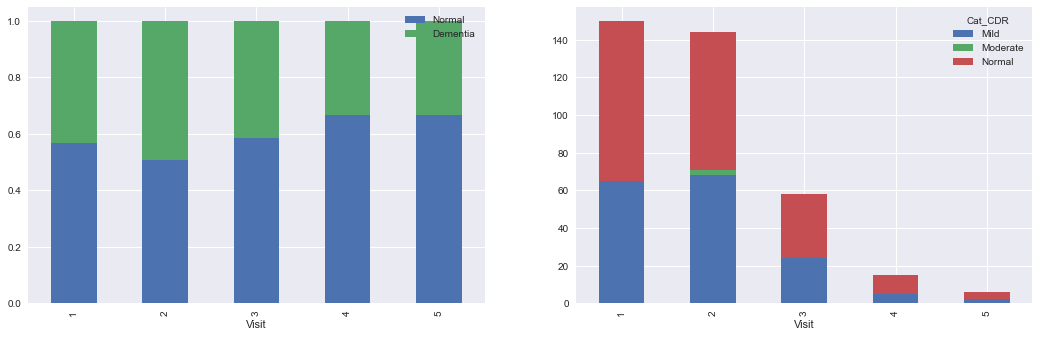

In [224]:
cat_comparison_plot('Visit')

**INFERENCE**

From the above plot:

Subject on their 2nd Visits have the most cases of Dementia.


#### Comparing Visit and Cat_MMSE

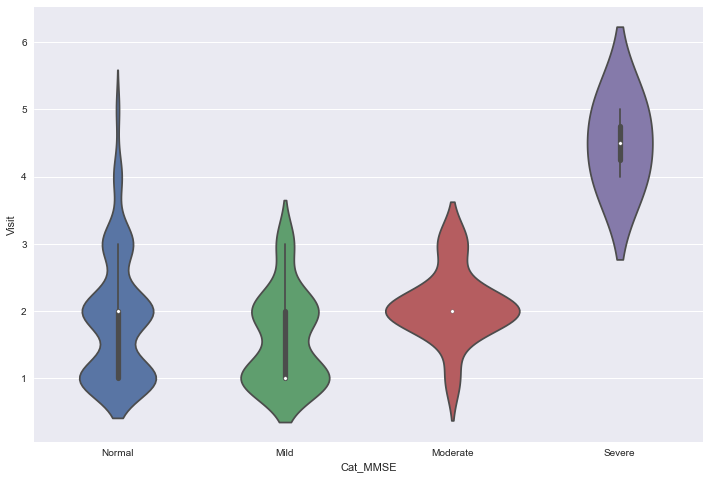

In [225]:
# Comparing Visit and Cat_MMSE
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cat_MMSE", y="Visit",split=True,
                    data=df)
plt.show()

**INFERENCE**

From the above plot:

Severe case of Cognitive Impairment is being noticed as the number of visits approaches 3.

## **STEP 2: FEATURE ENGINEERING (FEATURE SELECTION AND FEATURE SCALING)**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df=pd.read_csv('D:\Documents\PROJECTS\PYTHON PROGRAMMING\ML\Hamoye_Internship_Projects\HDSC-Premiere-Project-Team_PCA-\Data\dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


#### ENCODING CATEGORICAL DATA

#### Two categorical columns: M/F and Group.

In [228]:
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder.
ohe = OneHotEncoder()

# Perform OneHotEncoding on the Group column.
df_ohe = pd.DataFrame(ohe.fit_transform(df[['Group', 'M/F']]).toarray())

# Change Naming Convention.
df_ohe.columns = ohe.get_feature_names_out(['Group', 'M/F'])


# Merge OneHotEncoded column with df dataframe.
df2 = df.join(df_ohe)


# View dataframe.
df2

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [229]:
df = df2

#### We can decide to drop the Group and M/F columns since they have been encoded.

In [230]:
df.drop(['Group', 'M/F'], axis=1, inplace=True)
df

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M
0,OAS2_0001,OAS2_0001_MR1,1,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,2,457,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,1,0,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
3,OAS2_0002,OAS2_0002_MR2,2,560,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0
4,OAS2_0002,OAS2_0002_MR3,3,1895,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0
369,OAS2_0185,OAS2_0185_MR3,3,2297,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0
370,OAS2_0186,OAS2_0186_MR1,1,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,2,763,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


#### CATEGORIZING THE CDR COLUMN

In [231]:
def cat_CDR(n):
    if n == 0.0:
        return 0

    elif n == 0.5:
        return 1    

    else:                                        
        return 2


df['Cat_CDR'] = df['CDR'].apply(lambda x: cat_CDR(x))

#### DROP UNIMPORTANT FEATURES

In [232]:
df.drop(['CDR', 'Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)
df

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,Cat_CDR
0,1,0,87,14,2.0,27.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0,0
1,2,457,88,14,2.0,30.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0,0
2,1,0,75,12,NaN,23.0,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0,1
3,2,560,76,12,NaN,28.0,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0,1
4,3,1895,80,12,NaN,22.0,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.0,28.0,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0,1
369,3,2297,86,16,1.0,26.0,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0,1
370,1,0,61,13,2.0,30.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0,0
371,2,763,63,13,2.0,30.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0,0


To sort the missing values problem, the __Train data__ will be taken into consideration and used to compute the median value and  then these values will be then used for both the training and testing data. This is the best and optimal way to prevent overfitting later in the Model Building part.

In [233]:
# Split dataset into a training and testing set.
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop(['Cat_CDR'] , axis=1) , df['Cat_CDR'] , test_size=0.3, random_state=2)

In [234]:
X_train.shape, X_test.shape

((261, 14), (112, 14))

#### Missing Values Imputation
- by Median Imputation method

In [235]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.053640
MMSE    0.007663
dtype: float64

So SES has 5% missing values and MMSE has 0.7% missing values

In [236]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [237]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [238]:
X_train.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed
98,2,248,66,16,1.0,21.0,1708,0.703,1.028,0.0,1.0,0.0,0.0,1.0,1.0,21.0
301,1,0,77,13,2.0,29.0,1351,0.769,1.299,0.0,0.0,1.0,1.0,0.0,2.0,29.0
313,2,791,77,18,1.0,28.0,1559,0.713,1.125,0.0,0.0,1.0,1.0,0.0,1.0,28.0
366,2,553,73,16,3.0,21.0,1351,0.708,1.299,0.0,1.0,0.0,1.0,0.0,3.0,21.0
180,2,670,80,8,5.0,27.0,1381,0.751,1.270,0.0,0.0,1.0,1.0,0.0,5.0,27.0


In [239]:
X_test.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed
173,3,1435,73,12,4.0,16.0,1478,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0
205,1,0,66,12,4.0,30.0,1446,0.780,1.214,0.0,1.0,0.0,0.0,1.0,4.0,30.0
70,4,1770,73,13,4.0,30.0,1360,0.773,1.291,0.0,0.0,1.0,1.0,0.0,4.0,30.0
118,1,0,71,14,2.0,28.0,1461,0.756,1.202,0.0,0.0,1.0,1.0,0.0,2.0,28.0
32,5,2400,86,12,3.0,27.0,1813,0.761,0.968,0.0,0.0,1.0,0.0,1.0,3.0,27.0


#### CHECK OUT THE DISTRIBUTION AFTER MEDIAN IMPUTATION.

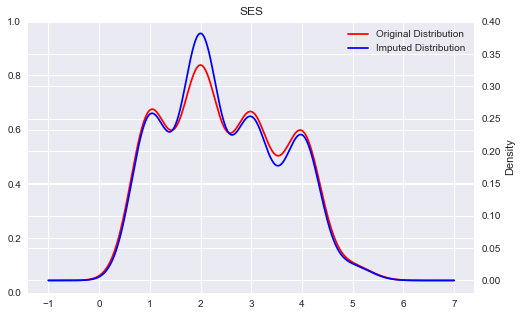

In [240]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

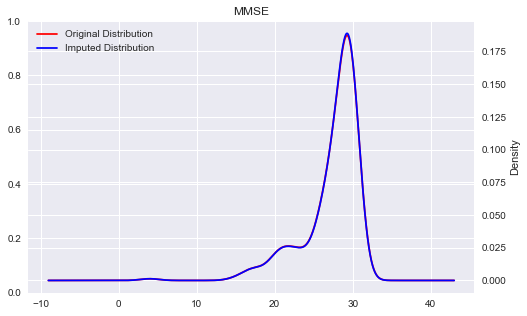

In [241]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

#### VARIANCE

In [242]:
# Compute the variance of SES and SES_imputed.
X_train['SES'].var() , X_train['SES_imputed'].var()  

(1.2747111681643135, 1.2175066312997347)

In [243]:
# Compute the variance of MMSE and MMSE_imputed.
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()   

(13.197988686360782, 13.119304450338934)

#### COVARIANCE

In [244]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed
Visit,0.780902,506.361936,0.908223,0.042175,-0.003637,0.038760,20.853846,-0.002538,-0.017416,0.000531,-0.053050,0.052520,-0.031963,0.031963,-0.003316,0.046950
MR Delay,506.361936,397751.465724,737.106720,78.802166,22.505349,219.979258,16157.121368,-1.176416,-13.485290,6.725950,-52.807442,46.081491,-17.847171,17.847171,23.316976,221.287857
Age,0.908223,737.106720,57.002122,-1.900531,-0.096919,0.912215,46.564103,-0.142053,-0.028252,0.248276,-0.199381,-0.048895,0.237533,-0.237533,-0.097878,0.890363
EDUC,0.042175,78.802166,-1.900531,8.288594,-2.315576,1.843704,137.343590,0.001165,-0.098189,0.099469,-0.382847,0.283378,-0.094960,0.094960,-2.135146,1.796640
SES,-0.003637,22.505349,-0.096919,-2.315576,1.274711,-0.543646,-54.159178,0.003206,0.040150,-0.078092,0.105049,-0.026958,0.011125,-0.011125,1.274711,-0.543646
MMSE,0.038760,219.979258,0.912215,1.843704,-0.543646,13.197989,-13.582548,0.050984,0.015770,0.166248,-1.152315,0.986067,0.344961,-0.344961,-0.483030,13.197989
eTIV,20.853846,16157.121368,46.564103,137.343590,-54.159178,-13.582548,31621.027350,-1.399160,-24.386239,-2.612821,1.780342,0.832479,-46.552564,46.552564,-50.115385,-17.732906
nWBV,-0.002538,-1.176416,-0.142053,0.001165,0.003206,0.050984,-1.399160,0.001356,0.001096,-0.000345,-0.005684,0.006029,0.004448,-0.004448,0.003220,0.050691
ASF,-0.017416,-13.485290,-0.028252,-0.098189,0.040150,0.015770,-24.386239,0.001096,0.019252,0.001321,-0.001559,0.000238,0.035676,-0.035676,0.036969,0.019758
Group_Converted,0.000531,6.725950,0.248276,0.099469,-0.078092,0.166248,-2.612821,-0.000345,0.001321,0.102122,-0.045535,-0.056587,0.010610,-0.010610,-0.070955,0.163439


Minimal changes can be seen in the covariance of SES~SES_imputed and MMSE~MMSE_imputed.

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [245]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [246]:
X_train.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed,missing_indicator_SES
98,2,248,66,16,1.0,21.0,1708,0.703,1.028,0.0,1.0,0.0,0.0,1.0,1.0,21.0,0
301,1,0,77,13,2.0,29.0,1351,0.769,1.299,0.0,0.0,1.0,1.0,0.0,2.0,29.0,0
313,2,791,77,18,1.0,28.0,1559,0.713,1.125,0.0,0.0,1.0,1.0,0.0,1.0,28.0,0
366,2,553,73,16,3.0,21.0,1351,0.708,1.299,0.0,1.0,0.0,1.0,0.0,3.0,21.0,0
180,2,670,80,8,5.0,27.0,1381,0.751,1.270,0.0,0.0,1.0,1.0,0.0,5.0,27.0,0


In [247]:
X_test.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed,missing_indicator_SES
173,3,1435,73,12,4.0,16.0,1478,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0,0
205,1,0,66,12,4.0,30.0,1446,0.780,1.214,0.0,1.0,0.0,0.0,1.0,4.0,30.0,0
70,4,1770,73,13,4.0,30.0,1360,0.773,1.291,0.0,0.0,1.0,1.0,0.0,4.0,30.0,0
118,1,0,71,14,2.0,28.0,1461,0.756,1.202,0.0,0.0,1.0,1.0,0.0,2.0,28.0,0
32,5,2400,86,12,3.0,27.0,1813,0.761,0.968,0.0,0.0,1.0,0.0,1.0,3.0,27.0,0


In [248]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [249]:
X_train.head()

,Visit,MR Delay,Age,EDUC,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed,missing_indicator_SES
98,2,248,66,16,1708,0.703,1.028,0.0,1.0,0.0,0.0,1.0,1.0,21.0,0
301,1,0,77,13,1351,0.769,1.299,0.0,0.0,1.0,1.0,0.0,2.0,29.0,0
313,2,791,77,18,1559,0.713,1.125,0.0,0.0,1.0,1.0,0.0,1.0,28.0,0
366,2,553,73,16,1351,0.708,1.299,0.0,1.0,0.0,1.0,0.0,3.0,21.0,0
180,2,670,80,8,1381,0.751,1.270,0.0,0.0,1.0,1.0,0.0,5.0,27.0,0


In [250]:
X_test.head()

,Visit,MR Delay,Age,EDUC,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,SES_imputed,MMSE_imputed,missing_indicator_SES
173,3,1435,73,12,1478,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0,0
205,1,0,66,12,1446,0.780,1.214,0.0,1.0,0.0,0.0,1.0,4.0,30.0,0
70,4,1770,73,13,1360,0.773,1.291,0.0,0.0,1.0,1.0,0.0,4.0,30.0,0
118,1,0,71,14,1461,0.756,1.202,0.0,0.0,1.0,1.0,0.0,2.0,28.0,0
32,5,2400,86,12,1813,0.761,0.968,0.0,0.0,1.0,0.0,1.0,3.0,27.0,0


In [251]:
X_train.isnull().sum()

Visit                    0
MR Delay                 0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
Group_Converted          0
Group_Demented           0
Group_Nondemented        0
M/F_F                    0
M/F_M                    0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [252]:
X_test.isnull().sum()

Visit                    0
MR Delay                 0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
Group_Converted          0
Group_Demented           0
Group_Nondemented        0
M/F_F                    0
M/F_M                    0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

#### So there are now no missing data in the dataset.

#### RE-SAMPLING THE TRAINING DATA 

In [253]:
# Balance the distribution of classes in the target variable with an oversampling of minority classes.
from imblearn.over_sampling import RandomOverSampler

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

ros = RandomOverSampler (random_state=2)
X_train, y_train = ros.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [142  88  31]

Number of observations in the target variable after oversampling of the minority class: [142 142 142]


In [254]:
# Second target to predict probability of having dementia
# This is a binary classificatio (0 and 1)
y_test1=y_test.replace({0:0,  1:1, 2:1})
y_train1=y_train.replace({0:0, 1:1, 2:1})

#### FEATURE SCALING (STANDARDIZATION)

In [255]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

#### FEATURE SCALING (NORMALIZATION)

In [256]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform ( X_train )
X_test_norm = scaler.transform ( X_test )

#### SUMMARY OF FEATURE ENGINEERING

In the Feature Engineering step, various processes of data selection, manipulation and transformation was carried out. They are as listed below:
- OneHotEncoding,
- Creation of cat_CDR column from CDR column,
- Dropping unimportant features (Feature Selection)
- Missing Values Imputation (Median Imputation),
- Resampling 
and
- Standardization / Normalization (Feature Scaling).

## STEP 3: MODELLING

#### MODELLING USING STANDARDIZED SET

In [257]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

clf = [ LogisticRegression(random_state=2), DecisionTreeClassifier(random_state=2), SVC (random_state=2),
       RandomForestClassifier(random_state=2), GradientBoostingClassifier(random_state=2) ]
models = [ 'Logistic Regression', 'Tree', 'Support vector machine', 'RFC', 'Gradient boost' ]

for clf, model in zip(clf,models):
  clf.fit ( X_train_std, y_train )
  y_pred = clf.predict ( X_test_std )
  print ( f'Cross validation score of {model}: %.3f \n' %cross_val_score (clf, X_train_std, y_train, cv=5).mean() )

Cross validation score of Logistic Regression: 0.836 

Cross validation score of Tree: 0.951 

Cross validation score of Support vector machine: 0.909 

Cross validation score of RFC: 0.970 

Cross validation score of Gradient boost: 0.970 



#### HYPERPARAMETER TUNING (STANDARDIZED SET)

In [258]:
from sklearn.model_selection import GridSearchCV

# gb = GradientBoostingClassifier(random_state=2)
rfc = RandomForestClassifier(n_jobs=-1, random_state=2) 

param_grid = { 
    # "n_estimators":[5,50,250,500],
    # "max_depth":[1,3,5,7,9],
    # "learning_rate":[0.01,0.1,1,10,100]
    'n_estimators': [500, 700, 900],
    'min_samples_split': [2,4,6,8,10]
}

gs = GridSearchCV (estimator = rfc,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 5,
                   verbose=1,
                   refit = True,
                   n_jobs = -1
                   )

gs = gs.fit ( X_train_std, y_train )

print ( 'Parameter setting that gave the best results on the hold out data:', gs.best_params_ )

print ( 'Mean cross-validated score of the best_estimator: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Parameter setting that gave the best results on the hold out data: {'min_samples_split': 2, 'n_estimators': 900}
Mean cross-validated score of the best_estimator: 0.974


In [259]:
gs.fit ( X_train_std, y_train )
y_pred = gs.predict ( X_test_std )
print ( f'Accuracy train score: %.4f' %gs.score (X_train_std, y_train) )
print ( f'Accuracy test score: %.4f' %accuracy_score ( y_test, y_pred ) )

Accuracy train score: 1.0000
Accuracy test score: 0.8839


#### CONFUSION MATRIX (STANDARDIZED SET)

Number of records in the test dataset: 112



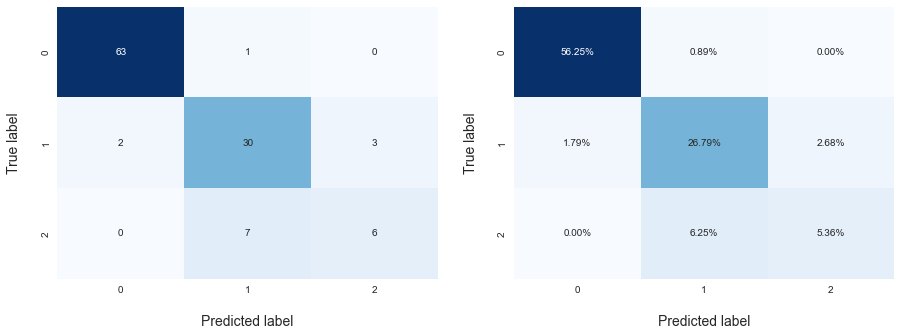

In [260]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (y_test, y_pred)

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

#### PRECISION, RECALL AND F1-SCORE USING RANDOM FOREST CLASSIFIER (STANDARDIZED SET)

In [261]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit (X_train_std, y_train)
print(classification_report(y_test, rfc.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.82      0.89      0.85        35
           2       0.70      0.54      0.61        13

    accuracy                           0.90       112
   macro avg       0.83      0.80      0.81       112
weighted avg       0.90      0.90      0.90       112



#### MODELLING USING NORMALIZED SET

In [262]:
clf = [ LogisticRegression(random_state=2), DecisionTreeClassifier(random_state=2), SVC (random_state=2),
       RandomForestClassifier(random_state=2), GradientBoostingClassifier(random_state=2) ]
models = [ 'Logistic Regression', 'Tree', 'Support vector machine', 'RFC', 'Gradient boost' ]

for clf, model in zip(clf,models):
  clf.fit ( X_train_norm, y_train )
  y_pred = clf.predict ( X_test_norm )
  print ( f'Cross validation score of {model}: %.3f \n' %cross_val_score (clf, X_train_norm, y_train, cv=5).mean() )

Cross validation score of Logistic Regression: 0.824 

Cross validation score of Tree: 0.951 

Cross validation score of Support vector machine: 0.847 

Cross validation score of RFC: 0.970 

Cross validation score of Gradient boost: 0.967 



#### HYPERPARAMETER TUNING (NORMALIZED SET)

In [263]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1, random_state=2) 

param_grid = { 
    'n_estimators': [500, 700, 900],
    'min_samples_split': [2,4,6,8,10]
}

gs = GridSearchCV ( estimator = rfc,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 5,
                   verbose=1,
                   refit = True,
                   n_jobs = -1
                   )

gs = gs.fit ( X_train_norm, y_train )

print ( 'Parameter setting that gave the best results on the hold out data:', gs.best_params_ )

print ( 'Mean cross-validated score of the best_estimator: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Parameter setting that gave the best results on the hold out data: {'min_samples_split': 2, 'n_estimators': 900}
Mean cross-validated score of the best_estimator: 0.974


In [264]:
gs.fit (X_train_norm, y_train)
y_pred = gs.predict ( X_test_norm )
print (f'Accuracy train score: %.4f' %gs.score (X_train_norm, y_train))
print (f'Accuracy test score: %.4f' %accuracy_score (y_test, y_pred ))

Accuracy train score: 1.0000
Accuracy test score: 0.8839


#### CONFUSION MATRIX (NORMALIZED SET)

Number of records in the test dataset: 112



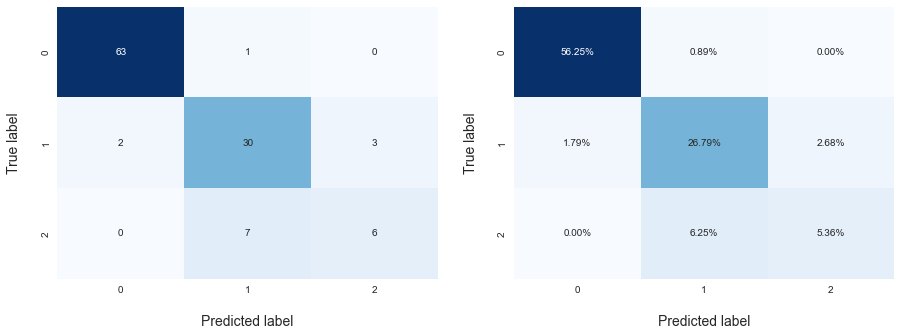

In [265]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (y_test, y_pred)

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

#### PRECISION, RECALL AND F1-SCORE USING RANDOM FOREST CLASSIFIER (NORMALIZED SET)

In [266]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit (X_train_norm, y_train)
print(classification_report(y_test, rfc.predict(X_test_norm)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.83      0.86      0.85        35
           2       0.73      0.62      0.67        13

    accuracy                           0.90       112
   macro avg       0.84      0.82      0.83       112
weighted avg       0.90      0.90      0.90       112



In [267]:
y_test.value_counts()

0    64
1    35
2    13
Name: Cat_CDR, dtype: int64

#### CONCLUSION
From the modelling carried out using the normalized set:

Accuracy may not be a good measure since the dataset is not balanced (classes have different number of data instances). Therefore, we use the precision and recall metrics as the measure.

The number of records in the test dataset is computed as 112. We can conclude from the classification report and the confusion matrix that:
- A precision score of 0.97 (Normal case) denotes that out of all that were predicted to be normal by the model, 97% of them are actually normal.
- A precision score of 0.83 (Mild Dementia case) denotes that out of all that were predicted to have mild dementia by the model, 83% of them actually have mild dementia.
- A precision score of 0.73 (Dementia case) denotes that out of all that were predicted to have dementia by the model, 73% of them actually have dementia.
- A recall score of 0.98 (Normal case) denotes that out of all that were truly normal, 98% of them were labelled 'Normal' by the model.
- A recall score of 0.86 (Mild dementia case) denotes that out of all that had Mild dementia, 86% of them were labelled 'Mild dementia' by the model.
- A recall score of 0.62 (dementia case) denotes that out of all that had dementia, 62% of them were labelled 'Dementia' by the model.

A better classification would be to carry out a binary classification.

#### Note that the precision and recall values change for each rerun of the code.

## Predicting the Probability of having dementia.

we will be using binary classification predict_proba and we will go with the model with the best performance (rfc).

In [268]:
rfc.fit(X_train_std, y_train1)  # y_train1 is the second target variable for the binary classification.
rfc.predict_proba(X_test_std)

array([[0.  , 1.  ],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.77, 0.23],
       [0.01, 0.99],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.99, 0.01],
       [0.13, 0.87],
       [0.04, 0.96],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.1 , 0.9 ],
       [0.24, 0.76],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.94, 0.06],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.09, 0.91],
       [0.6 , 0.4 ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.03,

In [269]:
X_test.reset_index().loc[1]

index                     205.000
Visit                       1.000
MR Delay                    0.000
Age                        66.000
EDUC                       12.000
eTIV                     1446.000
nWBV                        0.780
ASF                         1.214
Group_Converted             0.000
Group_Demented              1.000
Group_Nondemented           0.000
M/F_F                       0.000
M/F_M                       1.000
SES_imputed                 4.000
MMSE_imputed               30.000
missing_indicator_SES       0.000
Name: 1, dtype: float64

In [270]:
# Probability that a selected patient wll have demenatia.

rfc.predict_proba([X_test.iloc[67,]])[:,1] 

array([0.83])

We can change the value (67) to see the change in probability.